In [1]:
# Imports
import sys
sys.path.insert(0, '/home/carterrhea/Documents/LUCI/')  # Location of Luci
from LuciBase import Luci
import LUCI.LuciPlotting as lplt
import matplotlib.pyplot as plt

In [2]:
#Set Parameters
# Using Machine Learning Algorithm for Initial Guess
Luci_path = '/home/carterrhea/Documents/LUCI/'
cube_dir = '/home/carterrhea/Documents/LUCI_test'  # Path to data cube
cube_name = 'NGC6946_SN3.merged.cm1.1.0'  # don't add .hdf5 extension
object_name = 'NGC6946'
redshift = 0.000133
resolution = 1000 # The actual resolution is 400, but we don't have machine learning algorithms for that resolution, so we use 1000

In [3]:
# Create Luci object
cube = Luci(Luci_path, cube_dir+'/'+cube_name, cube_dir, object_name, redshift, resolution)

  0%|          | 0/9 [00:00<?, ?it/s]

Reading in data...


100%|██████████| 9/9 [00:04<00:00,  1.96it/s]


In [4]:
bkg_axis, bkg_sky = cube.extract_spectrum_region(cube_dir+'/bkg.reg', mean=True)  # We use mean=True to take the mean of the emission in the region instead of the sum

100%|██████████| 2064/2064 [00:05<00:00, 411.41it/s]


100%|██████████| 2064/2064 [00:04<00:00, 415.49it/s]


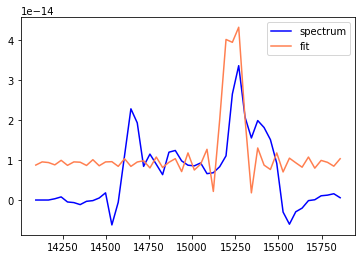

In [8]:
# Fit!
axis, sky, fit_dict = cube.fit_spectrum_region(
                                    ['NII6548', 'Halpha', 'NII6583'],#, 'SII6716', 'SII6731'],
                                    'sincgauss',
                                    [1,1,1], [1,1,1],
                                    #[1,1,1,1,1], [1,1,1,1,1],
                                    region=cube_dir+'/reg1.reg', bkg=bkg_sky)
plt.plot(axis, sky, color='blue', label='spectrum')
plt.plot(fit_dict['fit_axis'], fit_dict['fit_vector'], color='coral', label='fit')
plt.legend()

Evidently the fit of the Halpha/[NII] doublet complexe isn't very good. This is purely due to the poor resolution of the cube (R~400). 